In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
xls_file = pd.ExcelFile('reg-AVGLENGTH.xlsx')
df2 = xls_file.parse('Sheet1')
#df2.columns = ['x','y','k','z']
df2 = df2.drop(df2.columns[[0, 1]], axis=1)
df2.columns = ['x','y','k','z']
df2.drop(df2.index[:1], inplace=True)

In [3]:

df2 = df2.astype(float)
df2

,x,y,k,z
1,2.081112,0.891905,1.118921,173.415249
2,2.081112,0.891905,1.318921,151.792650
3,1.418888,0.891905,1.118921,207.978245
4,1.418888,0.891905,1.318921,140.409975
5,2.081112,2.094604,1.118921,227.910751
6,2.081112,2.094604,1.318921,151.782902
7,1.418888,2.094604,1.118921,194.594255
8,1.418888,2.094604,1.318921,121.673725
9,3.500000,1.500000,1.000000,499.367004
10,3.500000,1.500000,1.400000,168.764851


In [4]:
# Fit the model
model = ols("z ~ x + y + k", df2).fit()

# Print the summary
#print(model.summary())
model.summary()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.103
Date:                Wed, 30 Aug 2017   Prob (F-statistic):             0.0351
Time:                        13:02:11   Log-Likelihood:                -82.952
No. Observations:                  15   AIC:                             173.9
Df Residuals:                      11   BIC:                             176.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    820.6167    224.572      3.654      0.004     326.337    1314.896
x             13.0975     11.760      1.114      0.289     -12.786      38.981
y             20.0237     32.213      0.622      0.547     -50.877      90.924
k           -569.6321    177.630     -3.207      0.008    -960.594    -178.670
==============================================================================
Omnibus:                       10.052   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.237
Skew:                           1.330   Prob(JB):                       0.0442
Kurtosis:                       4.703   Cond. No.                         55.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
def f(row):
    if row['t-values'] < 0:
        val = 'r'
    elif row['t-values'] > 0:
        val = 'b'
    return val

ts= model.tvalues.values[1:]
tvals = pd.DataFrame(ts,columns=['t-values'])

#xls_file = pd.ExcelFile('all-params-reg.xlsx')
#df8 = xls_file.parse('Sheet1')

tvals.insert(0, "Parameter", namesL)
#tvals['param'] = df8.columns

tvals['flag'] = tvals.apply(f, axis=1)
tvals['t-values']  = tvals.apply((lambda x: np.absolute(x['t-values'])),axis=1)

tvals.sort_values('t-values',inplace=True,ascending=True)
tvals.reindex()

,Parameter,t-values,flag
1,Vertical constrast of minimum horizontal stress,0.621599,b
0,Lamination Density,1.113746,b
2,Horizontal stress Anisotropy (Shmax / Shmin),3.206838,r


In [6]:

namesL = ["Lamination Density","Vertical constrast of minimum horizontal stress","Horizontal stress Anisotropy (Shmax / Shmin)"]

['Vertical constrast of minimum horizontal stress', 'Lamination Density', 'Horizontal stress Anisotropy (Shmax / Shmin)']


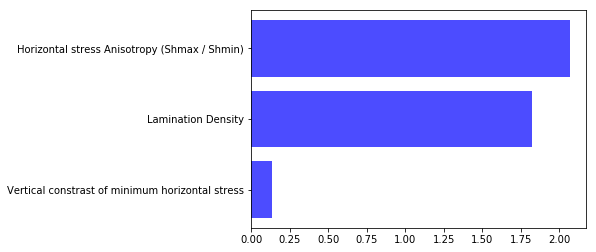

In [47]:
l = []
for item in tvals['Parameter']:
    #l.insert(0,item)
    l.append(item)
y_pos = np.arange(3)

print(l)

plt.close()
fig, ax = plt.subplots()
ax.barh(y_pos,tvals['t-values'],color='b',alpha=0.7)
ax.set_yticklabels(l)
#ax.invert_yaxis()

plt.yticks(y_pos,l)
plt.show()


In [13]:
df

NameError: name 'df' is not defined

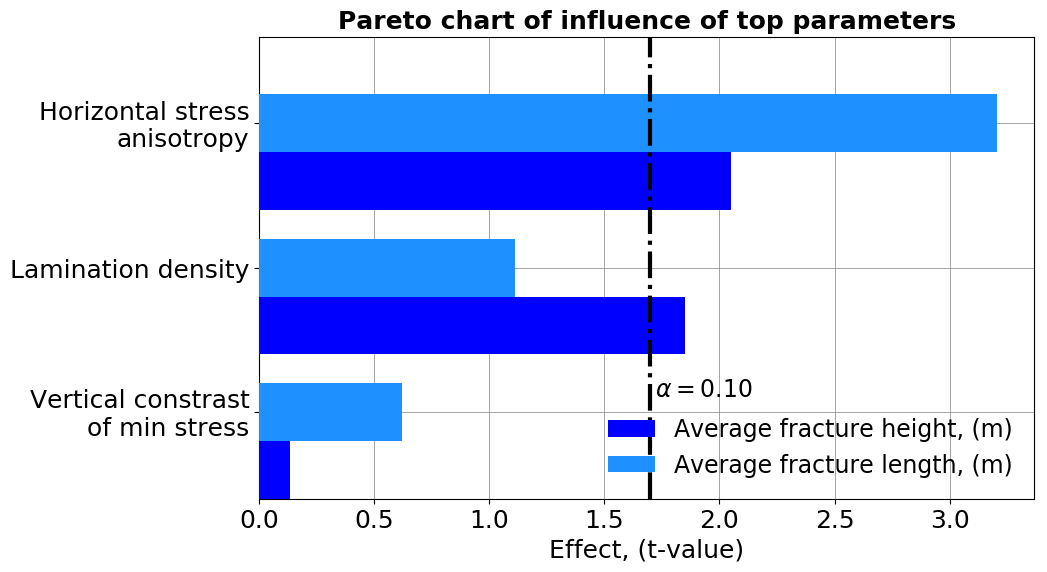

In [12]:

df = pd.DataFrame(dict(graph=['Vertical constrast of min stress', 'Lamination density', 'Horizontal stress anisotropy'],
                           m=[0.621599, 1.113746, 3.206838], n=[0.132757, 1.85, 2.051297])) 



from textwrap import wrap
#tvals['Parameter']
labels = [ '\n'.join(wrap(l, 20)) for l in df['graph'] ]
df['graph'] = labels

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(ind, df.n, width, color='blue', label="Average fracture height, (m)",alpha=1,zorder=3)
ax.barh(ind + width, df.m, width, color='dodgerblue', label="Average fracture length, (m)",alpha=1,zorder=3)

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
plt.xlabel('Effect, (t-value)',weight='normal')
plt.title('Pareto chart of influence of top parameters', weight='bold')


SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE,  weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title|
ax.grid(color='0.5', linestyle='-', linewidth=0.5, zorder=0)


leg = ax.legend(loc='best',fancybox=True, fontsize=17)
leg.get_frame().set_alpha(0)

#ax.legend()

plt.axvline(x=1.7, linestyle='dashdot', linewidth =3, color='0',zorder=3 )
plt.text(1.72,0.51, r'$ \alpha = 0.10 $', fontsize=17)

#plt.axvline(x=2.5, linestyle='dashdot', linewidth =3, color='0')
#plt.text(2.52,-0.8,  r'Bonferroni corrected $ \alpha = 0.10 $', style='italic' , fontsize=15)

#plt.savefig('pareto-chart-top-p-r-b3.pdf',dpi=500,bbox_inches='tight')

#plt.style.use('default')
plt.show()

In [83]:
# Fit the model
model = ols("z ~ x + y + I(y**2) + I(x**2) + x:y", df2).fit()
" x + y + I(x^2) + I(y^2) + x:y"
# Print the summary
#print(model.summary())
model.summary()


#'a ~ b + c + I(b**2)'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                 -0.165
Method:                 Least Squares   F-statistic:                    0.6031
Date:                Mon, 24 Jul 2017   Prob (F-statistic):              0.700
Time:                        11:43:15   Log-Likelihood:                -86.417
No. Observations:                  15   AIC:                             184.8
Df Residuals:                       9   BIC:                             189.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6850    284.670      0.052      0.960    -629.282     658.652
x             42.9441     91.196      0.471      0.649    -163.354     249.243
y            149.1500    297.710      0.501      0.628    -524.317     822.616
I(y ** 2)    -63.2581     89.874     -0.704      0.499    -266.567     140.050
I(x ** 2)     -9.3736      7.190     -1.304      0.225     -25.640       6.892
x:y           24.4119     50.014      0.488      0.637     -88.727     137.551
==============================================================================
Omnibus:                       17.214   Durbin-Watson:                   2.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.833
Skew:                           1.705   Prob(JB):                     0.000365
Kurtosis:                       6.702   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('interaction-data4.xlsx')
df = xls_file.parse('Sheet1')
df

,Horizontal stress Anisotropy (Shmax / Shmin),Lamination Density,Vertical constrast of minimum horizontal stress,X1*X2,X1*X3,X2*X3,Fracture surface area total - m2,Fracture height average - Fracture 1,Fracture height average - Fracture 2,Fracture height average - Fracture 3,Fracture height average - Fracture 4,Fracture length - Fracture 1,Fracture length - Fracture 2,Fracture length - Fracture 3,Fracture length - Fracture 4
0,-1,-1,-1,1,1,1,68.630127,-36.768731,-29.534490,-55.274409,-63.957817,33.110558,16.521433,-42.898336,148.503219
1,1,-1,-1,-1,-1,1,-66.370400,-74.453507,-65.770390,42.886386,76.981222,-62.392873,-64.619477,-0.157759,-77.989085
2,-1,1,-1,-1,1,-1,64.803198,-54.859719,-39.443511,-47.171569,-62.942590,38.650577,157.596045,-25.128857,97.311720
3,1,1,-1,1,-1,-1,-62.695810,74.154646,-9.644093,63.032351,65.589104,-47.692617,-75.589109,-37.968242,-77.947260
4,-1,-1,1,1,-1,-1,54.046345,-31.277127,0.388815,-54.512506,-47.160657,90.549962,30.915695,65.597873,36.365386
5,1,-1,1,-1,1,-1,-41.010520,26.919306,0.364822,-9.682076,-20.427493,-28.722399,-33.447624,62.077879,-80.434470
6,-1,1,1,-1,-1,1,24.320164,28.918948,42.128650,-28.253527,-18.133152,48.733713,12.369348,-36.545763,30.506468
7,1,1,1,1,1,1,-41.723104,67.366184,101.510196,88.975349,70.051384,-72.236921,-43.746310,15.023206,-76.315978


In [15]:

dfi =df

In [17]:
# create lists of columns
params = []
measures = []

#for -1 and +1 limits
data_low = {}
data_high = {}

#collect column names 
for col in dfi:
    if (dfi.columns.get_loc(col) <6):
        params.append(col)
    elif (dfi.columns.get_loc(col) >=6):
        measures.append(col)

print(params, measures)
        
for c2 in params:
    data_low[c2] = []
    data_high[c2] = []
    
    for c in measures:
        
        #calculate means for highs and lows
        data_low[c2].append((dfi.loc[dfi[c2] == -1, c].sum()) / dfi.loc[dfi[c2] == -1, c].count())
        data_high[c2].append((dfi.loc[dfi[c2] == 1, c].sum()) / dfi.loc[dfi[c2] == 1, c].count())



meanDF_low = pd.DataFrame(data_low,columns=params)
meanDF_high = pd.DataFrame(data_high,columns=params)


meanDF_high.insert(0,'Measures',measures)
meanDF_low.insert(0,'Measures',measures)

meanDF_low


['Horizontal stress Anisotropy (Shmax / Shmin) ', 'Lamination Density', 'Vertical constrast of minimum horizontal stress', 'X1*X2', 'X1*X3', 'X2*X3'] ['Fracture surface area total - m2', 'Fracture height average - Fracture 1', 'Fracture height average - Fracture 2', 'Fracture height average - Fracture 3', 'Fracture height average - Fracture 4', 'Fracture length - Fracture 1', 'Fracture length - Fracture 2', 'Fracture length - Fracture 3', 'Fracture length - Fracture 4']


,Measures,Horizontal stress Anisotropy (Shmax / Shmin),Lamination Density,Vertical constrast of minimum horizontal stress,X1*X2,X1*X3,X2*X3
0,Fracture surface area total - m2,52.949959,3.823888,1.091779,-4.564390,-12.674925,3.785803
1,Fracture height average - Fracture 1,-23.496657,-28.895015,-22.981828,-18.368743,-0.664260,3.734276
2,Fracture height average - Fracture 2,-6.615134,-23.637810,-36.098121,-15.680107,-8.224254,-12.083492
3,Fracture height average - Fracture 3,-46.303002,-19.145651,0.868190,-10.555196,5.788176,-12.083450
4,Fracture height average - Fracture 4,-48.048554,-13.641186,3.917480,-6.130503,19.319129,-16.235409
5,Fracture length - Fracture 1,52.761203,8.136312,-9.581089,-0.932745,7.299546,13.196381
6,Fracture length - Fracture 2,54.350630,-12.657493,8.477223,17.974573,-24.230886,19.868752
7,Fracture length - Fracture 3,-9.743771,21.154914,-26.538299,0.061375,-2.268473,16.144663
8,Fracture length - Fracture 4,78.171698,6.611263,22.469648,-7.651342,-22.266123,-6.176156


In [267]:
(dfi.loc[dfi[c] == -1, c2].sum())

0

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]
here
here
cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f'])


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


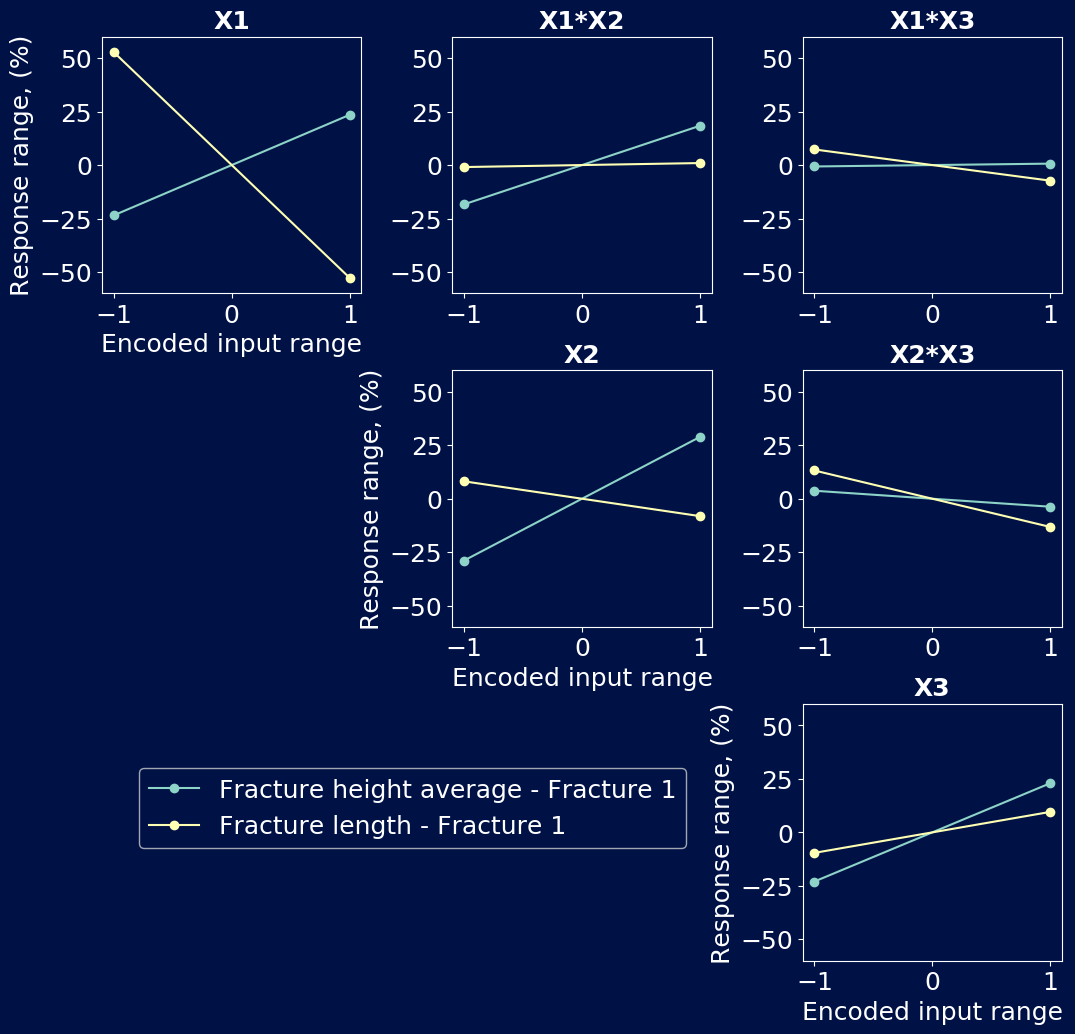

In [19]:
from cycler import cycler
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bg_color='#001146'

mylist = []
rows=[1,5]

for i in range(0,3):
    for j in range(0,3):
        mylist.append([j,i])
print(mylist)

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()
sums = meanDF_low.columns[1:]

plt.close()

f, axarr = plt.subplots(3, 3, figsize=(12,12),facecolor=bg_color)

t = 0
# loop over charts of properties
 
    
 #for a given chart, plot the lines for outputs
for output in rows:
    
    for t in range(0,len(mylist)):
        
        if(t==0):
            col_t = "Horizontal stress Anisotropy (Shmax / Shmin) "
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('X1', weight='bold')
        elif(t==4):   
            col_t = "Lamination Density"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('X2', weight='bold')   
        elif(t==8):   
            col_t = "Vertical constrast of minimum horizontal stress"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('X3', weight='bold')  
        elif(t==3):   
            col_t = "X1*X2"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
       
        elif(t==6):   
            col_t = "X1*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
    
        elif(t==7):   
            col_t = "X2*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold') 
    
    print('here')
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-60,60)
        subplot.set_axis_bgcolor(bg_color)
        #if (n==0):
            #subplot.set_xlabel('Variable range')
            #subplot.set_ylabel('Response range, (%)')
        if (m==0 and n==0 or m==1 and n==1 or m==2 and n==2):
            subplot.set_xlabel('Encoded input range')
            subplot.set_ylabel('Response range, (%)')
        if (m==2 and n==2):
            subplot.legend(bbox_to_anchor=(-0.4, 0.8),facecolor=bg_color)
            
            
#plt.text(-5,-50,'test')
f.delaxes(axarr[1][0])      
f.delaxes(axarr[2][0])      
f.delaxes(axarr[2][1])      

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

print(plt.rcParams['axes.prop_cycle'])



plt.rc('font', size=BIGGER_SIZE, weight='normal',)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.35, hspace=0.3)
#plt.tight_layout()
#plt.legend(loc='best')
#f.tight_layout()
plt.style.use('dark_background')

plt.show()
#plt.savefig('inter-plot-combo-r-2.pdf',dpi=500)



In [189]:
[-1,1],[meanDF_low['Horizontal stress Anisotropy (Shmax / Shmin) '][output], meanDF_high['Horizontal stress Anisotropy (Shmax / Shmin) '][output]]

([-1, 1], [309942.25, 95343.57421875])

In [153]:
sums = meanDF_low.columns

In [160]:
meanDF_low.columns[1:]


Index(['Measures', 'Horizontal stress Anisotropy (Shmax / Shmin) ',
       'Lamination Density', 'Vertical constrast of minimum horizontal stress',
       'X1*X2', 'X1*X3', 'X2*X3'],
      dtype='object')

In [190]:
[meanDF_low['Horizontal stress Anisotropy (Shmax / Shmin) '][output], meanDF_high['Horizontal stress Anisotropy (Shmax / Shmin) '][output]]

[309942.25, 95343.57421875]

In [79]:
df

,Horizontal stress Anisotropy (Shmax / Shmin),Lamination Density,Vertical constrast of minimum horizontal stress,X1*X2,X1*X3,X2*X3,Fracture surface area total - m2,Fracture height average - Fracture 1,Fracture height average - Fracture 2,Fracture height average - Fracture 3,Fracture height average - Fracture 4,Fracture length - Fracture 1,Fracture length - Fracture 2,Fracture length - Fracture 3,Fracture length - Fracture 4
0,-1,-1,-1,1,1,1,68.630127,-36.768731,-29.534490,-55.274409,-63.957817,33.110558,16.521433,-42.898336,148.503219
1,1,-1,-1,-1,-1,1,-66.370400,-74.453507,-65.770390,42.886386,76.981222,-62.392873,-64.619477,-0.157759,-77.989085
2,-1,1,-1,-1,1,-1,64.803198,-54.859719,-39.443511,-47.171569,-62.942590,38.650577,157.596045,-25.128857,97.311720
3,1,1,-1,1,-1,-1,-62.695810,74.154646,-9.644093,63.032351,65.589104,-47.692617,-75.589109,-37.968242,-77.947260
4,-1,-1,1,1,-1,-1,54.046345,-31.277127,0.388815,-54.512506,-47.160657,90.549962,30.915695,65.597873,36.365386
5,1,-1,1,-1,1,-1,-41.010520,26.919306,0.364822,-9.682076,-20.427493,-28.722399,-33.447624,62.077879,-80.434470
6,-1,1,1,-1,-1,1,24.320164,28.918948,42.128650,-28.253527,-18.133152,48.733713,12.369348,-36.545763,30.506468
7,1,1,1,1,1,1,-41.723104,67.366184,101.510196,88.975349,70.051384,-72.236921,-43.746310,15.023206,-76.315978


In [69]:
def fg(response_var,v1,v2):
    results = []
    # V1 is xaxis
    #high line, when second variable is high
    #print(v2,v1,(df.loc[(df[v2] == 1) & (df[v1] == -1) , response_var].sum()))
    
    results.append((df.loc[(df[v2] == 1) & (df[v1] == -1) , response_var].sum()) / df.loc[(df[v2] == 1) & (df[v1] == -1), response_var].count())
    results.append((df.loc[(df[v2] == 1) & (df[v1] == 1) , response_var].sum()) / df.loc[(df[v2] == 1) & (df[v1] == 1), response_var].count())
    
    #low line, when second variable is low
    results.append((df.loc[(df[v2] == -1) & (df[v1] == -1) , response_var].sum()) / df.loc[(df[v2] == -1) & (df[v1] == -1), response_var].count())
    results.append((df.loc[(df[v2] == -1) & (df[v1] == 1) , response_var].sum()) / df.loc[(df[v2] == -1) & (df[v1] == 1), response_var].count())
    
    return results


In [370]:
#fg('Fracture surface area total - m2','Horizontal stress Anisotropy (Shmax / Shmin) ', 'Lamination Density')
fg(response_var,x2,x3)[0]

Lamination Density Lamination Density 0


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


nan

In [323]:
v2 = 'Lamination Density'
v1 = 'Horizontal stress Anisotropy (Shmax / Shmin) '
v3 = 'Lamination Density'
response_var = 'Fracture surface area total - m2'
results=[]


results.append()


In [256]:
plt.close()
f, axarr = plt.subplots(3, 3, figsize=(10,10))

response_var = 'Fracture surface area total - m2'
x2 = 'Lamination Density'
x1 = 'Horizontal stress Anisotropy (Shmax / Shmin) '
x3 = 'Vertical constrast of minimum horizontal stress'

print([fg(response_var,x1,x2)[0],fg(response_var,x1,x2)[1]])
print([fg(response_var,x1,x3)[0],fg(response_var,x1,x3)[1]])
print([fg(response_var,x2,x3)[0],fg(response_var,x2,x3)[1]])

axarr[0,0].plot([-1,1],[fg(response_var,x1,x3)[0],fg(response_var,x1,x3)[1]] , marker = 'o',label='high')
axarr[0,0].plot([-1,1],[fg(response_var,x1,x3)[2],fg(response_var,x1,x3)[3]] , marker = 'o',label='low')
axarr[0,0].set_title('X1*X3', weight='bold')

axarr[0,1].plot([-1,1],[fg(response_var,x1,x2)[0],fg(response_var,x1,x2)[1]] , marker = 'o')
axarr[0,1].plot([-1,1],[fg(response_var,x1,x2)[2],fg(response_var,x1,x2)[3]] , marker = 'o')
axarr[0,1].set_title('X1*X2', weight='bold')


axarr[1,0].plot([-1,1],[fg(response_var,x2,x3)[0],fg(response_var,x2,x3)[1]] , marker = 'o')
axarr[1,0].plot([-1,1],[fg(response_var,x2,x3)[2],fg(response_var,x2,x3)[3]] , marker = 'o')
axarr[1,0].set_title('X2*X3', weight='bold')

axarr[1,2].plot([-1,1],[fg(response_var,x2,x1)[0],fg(response_var,x2,x1)[1]] , marker = 'o')
axarr[1,2].plot([-1,1],[fg(response_var,x2,x1)[2],fg(response_var,x2,x1)[3]] , marker = 'o')
axarr[1,2].set_title('X2*X1', weight='bold')

axarr[2,1].plot([-1,1],[fg(response_var,x3,x2)[0],fg(response_var,x3,x2)[1]] , marker = 'o')
axarr[2,1].plot([-1,1],[fg(response_var,x3,x2)[2],fg(response_var,x3,x2)[3]] , marker = 'o')
axarr[2,1].set_title('X3*X2', weight='bold')


axarr[2,2].plot([-1,1],[fg(response_var,x3,x1)[0],fg(response_var,x3,x1)[1]] , marker = 'o')
axarr[2,2].plot([-1,1],[fg(response_var,x3,x1)[2],fg(response_var,x3,x1)[3]] , marker = 'o')
axarr[2,2].set_title('X3*X1', weight='bold')

plt.text(-6.3, 0, 'X3 = Vertical constrast \nof min stress', wrap=True, ha='center' )
plt.text(-2.9, 250, 'X2 = Lamination \nDensity',wrap=True,ha='center')
plt.text(0, 490, 'X1 = Horizontal stress \nAnisotropy ',wrap=True,ha='center')

for (m,n), subplot in np.ndenumerate(axarr):
    subplot.set_xlim(-1.1,1.1)
    subplot.set_ylim(-100,100)
    subplot.legend(bbox_to_anchor=(0.68, -2.2))
                   
    if (n==0):
        #subplot.set_xlabel('Variable range')
        subplot.set_ylabel('Response range, (%)')
        
    if (m==2 and n==2):
        subplot.legend(bbox_to_anchor=(0,0))
    #if (n is not 0):
        #subplot.set_yticklabels([])


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
        
#row,col
f.delaxes(axarr[0][2])
f.delaxes(axarr[1][1])
f.delaxes(axarr[2][0])
#f.tight_layout()
f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.39, hspace=0.35)
#plt.show()
plt.savefig('inter-plot-means-p-r.pdf',dpi=500, bbox_inches='tight')

[44.561680914793442, -52.209456807830961]
[39.183254456868603, -41.366811815322734]
[6.5179125946907241, -8.7014699531448514]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [444]:
left  = 0.1  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 14   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

In [250]:
df

,graph,m,n
0,Vertical constrast of minimum\nhorizontal stress,0.621599,0.132757
1,Lamination Density,1.113746,1.850000
2,Horizontal stress Anisotropy\n(Shmax / Shmin),3.206838,2.051297


[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]
here
here
here
here
cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f'])


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


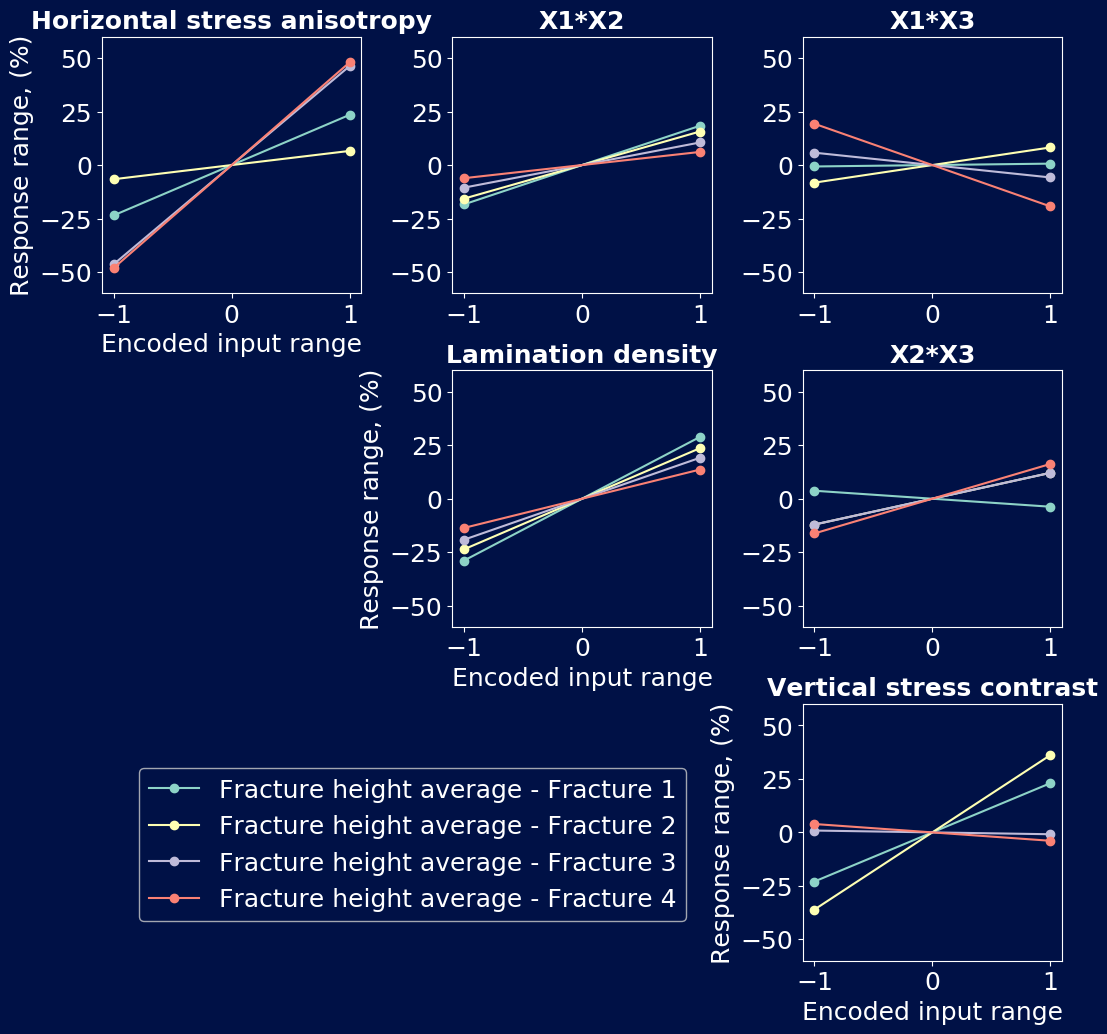

In [37]:
from cycler import cycler
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bg_color='#001146'

mylist = []
rows=[1,2,3,4]

for i in range(0,3):
    for j in range(0,3):
        mylist.append([j,i])
print(mylist)

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()
sums = meanDF_low.columns[1:]

plt.close()

f, axarr = plt.subplots(3, 3, figsize=(12,12),facecolor=bg_color)

t = 0
# loop over charts of properties
 
    
 #for a given chart, plot the lines for outputs
for output in rows:
    
    for t in range(0,len(mylist)):
        
        if(t==0):
            col_t = "Horizontal stress Anisotropy (Shmax / Shmin) "
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Horizontal stress anisotropy',weight='bold')
        elif(t==4):   
            col_t = "Lamination Density"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Lamination density', weight='bold')   
        elif(t==8):   
            col_t = "Vertical constrast of minimum horizontal stress"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Vertical stress contrast', weight='bold')  
        elif(t==3):   
            col_t = "X1*X2"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
       
        elif(t==6):   
            col_t = "X1*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
    
        elif(t==7):   
            col_t = "X2*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold') 
    
    print('here')
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-60,60)
        subplot.set_axis_bgcolor(bg_color)
        #if (n==0):
            #subplot.set_xlabel('Variable range')
            #subplot.set_ylabel('Response range, (%)')
        if (m==0 and n==0 or m==1 and n==1 or m==2 and n==2):
            subplot.set_xlabel('Encoded input range')
            subplot.set_ylabel('Response range, (%)')
        if (m==2 and n==2):
            subplot.legend(bbox_to_anchor=(-0.4, 0.8),facecolor=bg_color)
            
            
#plt.text(-5,-50,'test')
f.delaxes(axarr[1][0])      
f.delaxes(axarr[2][0])      
f.delaxes(axarr[2][1])      

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

print(plt.rcParams['axes.prop_cycle'])



plt.rc('font', size=BIGGER_SIZE, weight='normal',)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.35, hspace=0.3)
#plt.tight_layout()
#plt.legend(loc='best')
#f.tight_layout()
plt.style.use('dark_background')

plt.show()
#plt.savefig('inter-plot-combo-r-2.pdf',dpi=500)



/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


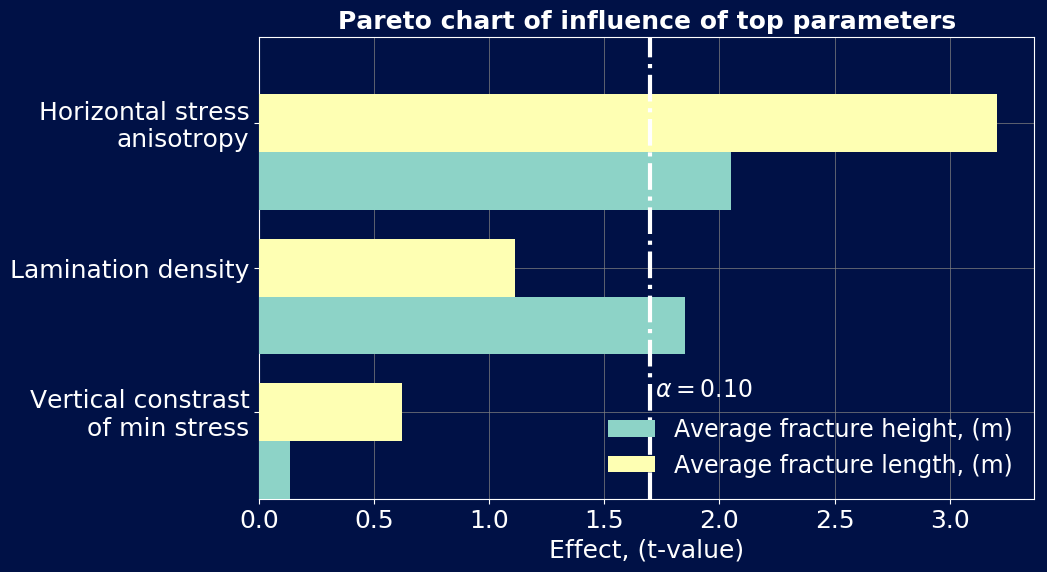

In [34]:
#as above pareto 2 but with dark colors

df = pd.DataFrame(dict(graph=['Vertical constrast of min stress', 'Lamination density', 'Horizontal stress anisotropy'],
                           m=[0.621599, 1.113746, 3.206838], n=[0.132757, 1.85, 2.051297])) 

bg_color='#001146'

from textwrap import wrap
#tvals['Parameter']
labels = [ '\n'.join(wrap(l, 20)) for l in df['graph'] ]
df['graph'] = labels

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(10,6),facecolor=bg_color)

plt.rcParams['axes.prop_cycle'] = cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f'])

ax.barh(ind, df.n, width, label="Average fracture height, (m)",alpha=1,zorder=3)
ax.barh(ind + width, df.m, width, label="Average fracture length, (m)",alpha=1,zorder=3)

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
plt.xlabel('Effect, (t-value)',weight='normal')
plt.title('Pareto chart of influence of top parameters', weight='bold')



SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE,  weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title|
ax.grid(color='0.5', linestyle='-', linewidth=0.5, zorder=0)
ax.set_facecolor(bg_color)


leg = ax.legend(loc='best',fancybox=True, fontsize=17)
leg.get_frame().set_alpha(0)

#ax.legend()

plt.axvline(x=1.7, linestyle='dashdot', linewidth =3,color='white',zorder=3 )
plt.text(1.72,0.51, r'$ \alpha = 0.10 $', fontsize=17)

#plt.axvline(x=2.5, linestyle='dashdot', linewidth =3, color='0')
#plt.text(2.52,-0.8,  r'Bonferroni corrected $ \alpha = 0.10 $', style='italic' , fontsize=15)

#plt.savefig('pareto-chart-top-p-r-b3.pdf',dpi=500,bbox_inches='tight')

#plt.style.use('default')
plt.show()

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]
here
here
cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


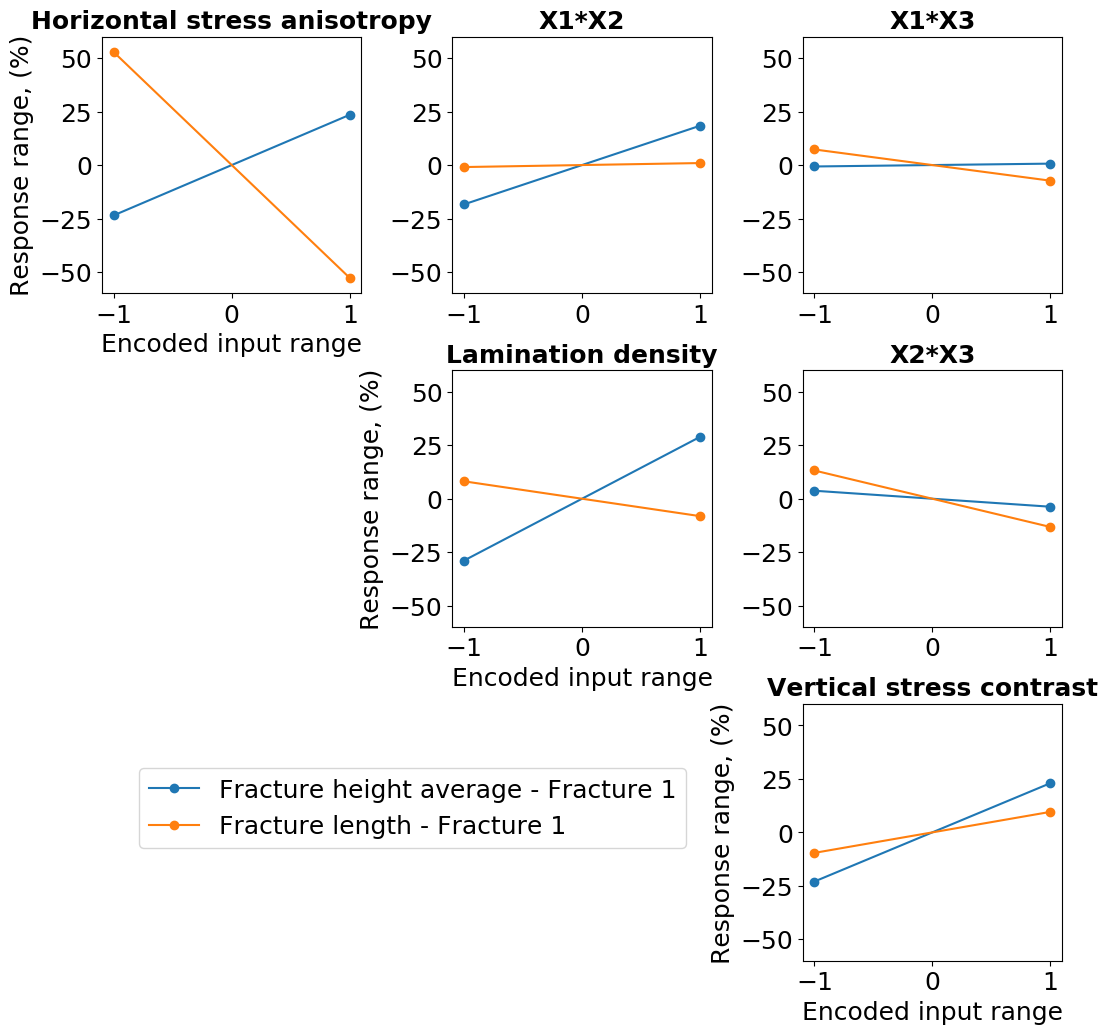

In [43]:
#for poster 

from cycler import cycler
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18
plt.style.use('default')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



mylist = []
rows=[1,5]

for i in range(0,3):
    for j in range(0,3):
        mylist.append([j,i])
print(mylist)

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()
sums = meanDF_low.columns[1:]

plt.close()

f, axarr = plt.subplots(3, 3, figsize=(12,12))

t = 0
# loop over charts of properties
 
    
 #for a given chart, plot the lines for outputs
for output in rows:
    
    for t in range(0,len(mylist)):
        
        if(t==0):
            col_t = "Horizontal stress Anisotropy (Shmax / Shmin) "
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Horizontal stress anisotropy',weight='bold')
        elif(t==4):   
            col_t = "Lamination Density"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Lamination density', weight='bold')   
        elif(t==8):   
            col_t = "Vertical constrast of minimum horizontal stress"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title('Vertical stress contrast', weight='bold')  
        elif(t==3):   
            col_t = "X1*X2"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
       
        elif(t==6):   
            col_t = "X1*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold')  
    
        elif(t==7):   
            col_t = "X2*X3"
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col_t][output], meanDF_high[col_t][output]] , marker = 'o', label=names[output])
            axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col_t, weight='bold') 
    
    print('here')
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-60,60)

        #if (n==0):
            #subplot.set_xlabel('Variable range')
            #subplot.set_ylabel('Response range, (%)')
        if (m==0 and n==0 or m==1 and n==1 or m==2 and n==2):
            subplot.set_xlabel('Encoded input range')
            subplot.set_ylabel('Response range, (%)')
        if (m==2 and n==2):
            subplot.legend(bbox_to_anchor=(-0.4, 0.8))
            
            
#plt.text(-5,-50,'test')
f.delaxes(axarr[1][0])      
f.delaxes(axarr[2][0])      
f.delaxes(axarr[2][1])      

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

print(plt.rcParams['axes.prop_cycle'])



plt.rc('font', size=BIGGER_SIZE, weight='normal',)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.35, hspace=0.3)
#plt.tight_layout()
#plt.legend(loc='best')
#f.tight_layout()


plt.show()
#plt.savefig('inter-plot-combo-r-2.pdf',dpi=500)

